# Setup

In [94]:
import pandas as pd
import seaborn as sns

%matplotlib inline

In [95]:
import matplotlib.transforms as transforms
import matplotlib.pyplot as plt

In [96]:
sns.set(rc={'figure.figsize':(24, 13.5)}, font_scale = 2.7)

In [97]:
#input args
out_dir = './out'
log_id = 1

#derived args
split_logs_dir = f'{out_dir}/split_logs/'

In [98]:
#access all 3 measurement axes
dim3 = lambda x : [x + '_' + s for s in ['x', 'y', 'z']]

# State preparation

In [99]:
state_log = pd.read_csv(f'{split_logs_dir}/state_transitions.csv', index_col = 0)
state_log.head()

,Timestamp,Log Entry Type,State,Time_s
Log Entry,,,,
136,1001,STATE,IDLE,1.001
148,1011,STATE,IDLE,1.011
156,1021,STATE,IDLE,1.021
164,1031,STATE,IDLE,1.031
172,1041,STATE,IDLE,1.041


In [100]:
state_log.State.unique()

array(['IDLE'], dtype=object)

In [101]:
state_transitions = state_log.loc[state_log['State'].shift(1) != state_log['State']]

In [102]:
for state_transition in state_transitions.to_dict(orient = 'rows'):
    print(state_transition)

{'Timestamp': 1001, 'Log Entry Type': 'STATE', 'State': 'IDLE', 'Time_s': 1.001}


In [103]:
def plot_states(state_transitions):
    for state_transition in state_transitions.to_dict(orient = 'rows'):
        ax.axvline(state_transition['Time_s'], color='grey', linestyle='--')
        ax.text(state_transition['Time_s'], 0.1, state_transition['State'], fontsize=20, transform=ax.get_xaxis_transform(), rotation=90)

# IMU Plotting

In [104]:
imu_log = pd.read_csv(f'{split_logs_dir}/imu.csv', index_col = 0)
imu_log.head()

,Timestamp,Time_s,Log Entry Type,Sensor Board ID,Sensor Board Timestamp,Sensor Type,Acc_x,Acc_y,Acc_z,Gyro_x,Gyro_y,Gyro_z
Log Entry,,,,,,,,,,,,
7,811,0.811,SENSOR,1,0,IMU,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
9,811,0.811,SENSOR,2,0,IMU,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
11,811,0.811,SENSOR,3,0,IMU,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
13,821,0.821,SENSOR,1,0,IMU,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
15,821,0.821,SENSOR,2,22414,IMU,0.010742,-0.024414,-0.99707,0.123457,-0.493827,-0.277778


In [105]:
#convert from wide to long format for plotting

imu_log.reset_index(inplace = True)
imu_log_long = pd.wide_to_long(imu_log, stubnames=['Acc', 'Gyro'], i = 'Log Entry', j='Axis', sep='_', suffix='\w')
imu_log_long['Axis'] = imu_log_long.index.get_level_values(1)
#sampling for faster drawing
imu_log_long = imu_log_long[::10]
imu_log_long.head()

,,Sensor Board Timestamp,Sensor Type,Log Entry Type,Sensor Board ID,Timestamp,Time_s,Acc,Gyro,Axis
Log Entry,Axis,,,,,,,,,
7,x,0,IMU,SENSOR,1,811,0.811,0.000000,0.000000,x
27,x,22434,IMU,SENSOR,2,841,0.841,0.009766,0.123457,x
47,x,22624,IMU,SENSOR,3,871,0.871,-0.012695,-0.154321,x
68,x,22604,IMU,SENSOR,1,911,0.911,-0.030273,0.154321,x
91,x,22534,IMU,SENSOR,2,941,0.941,0.010742,0.123457,x


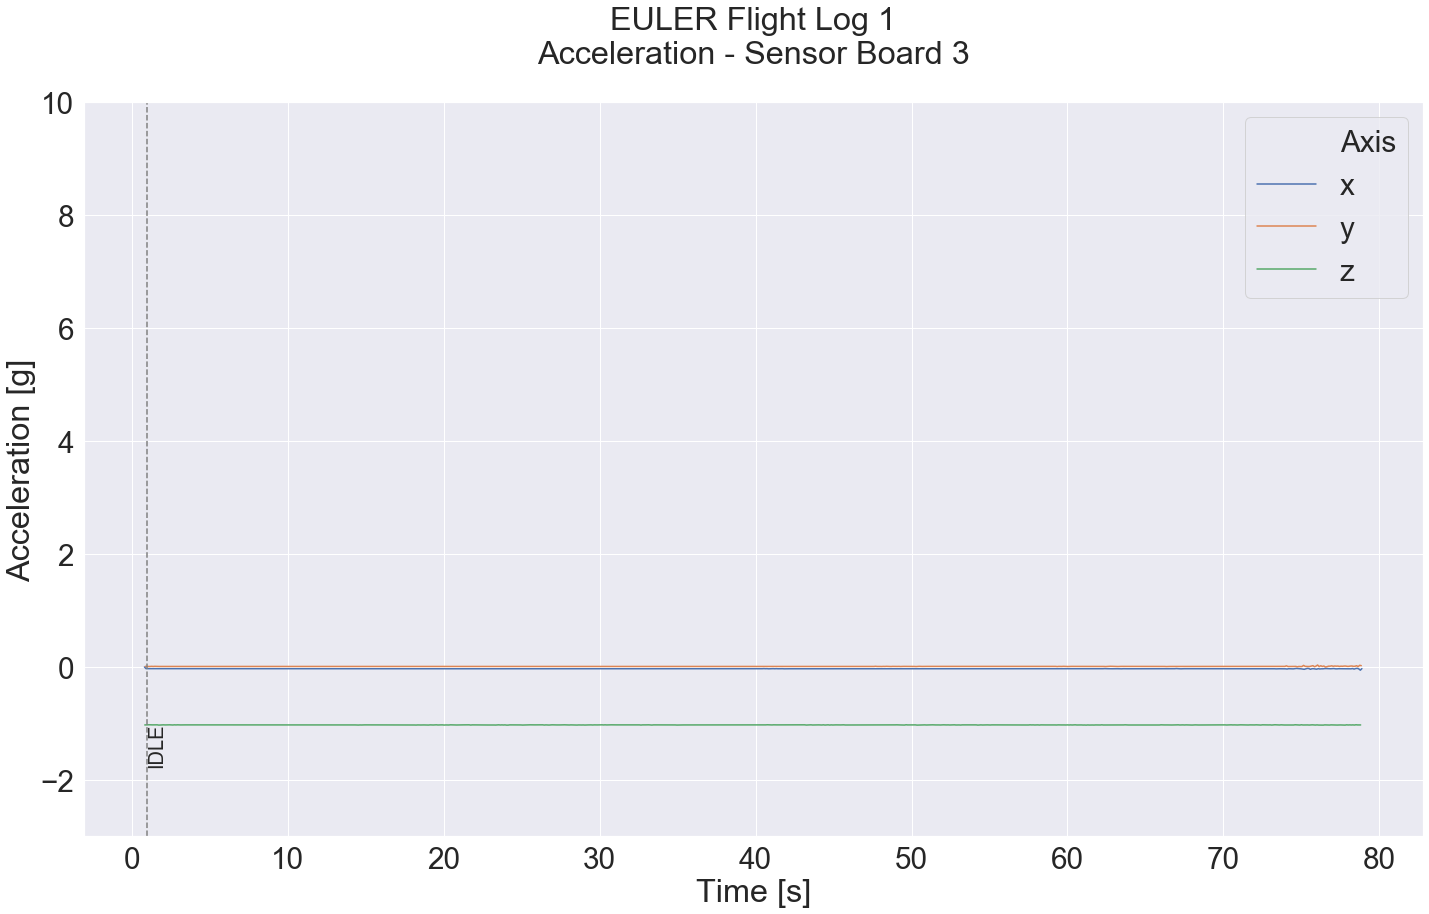

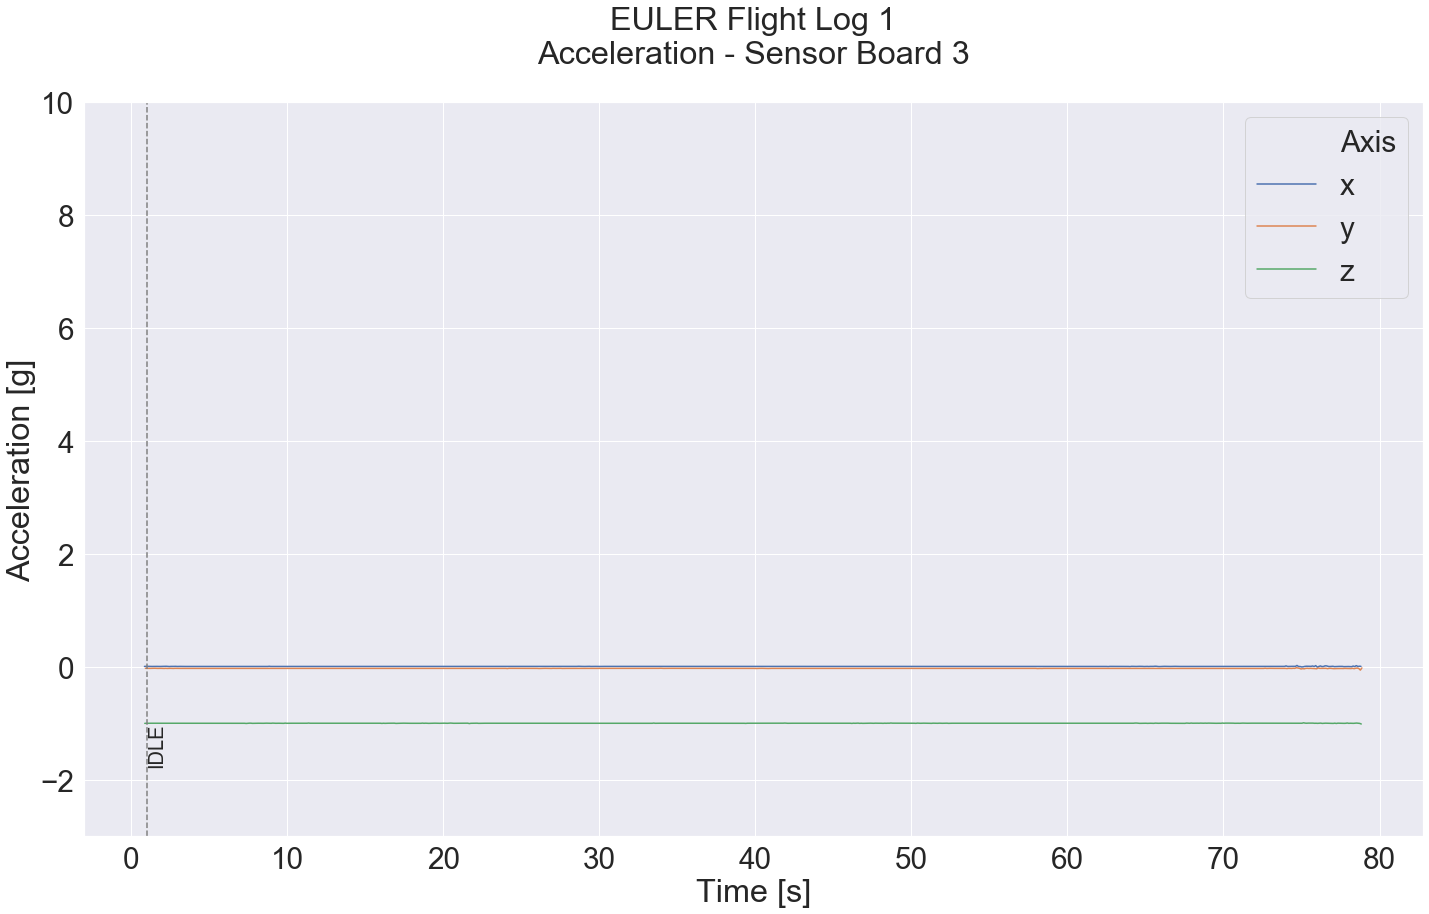

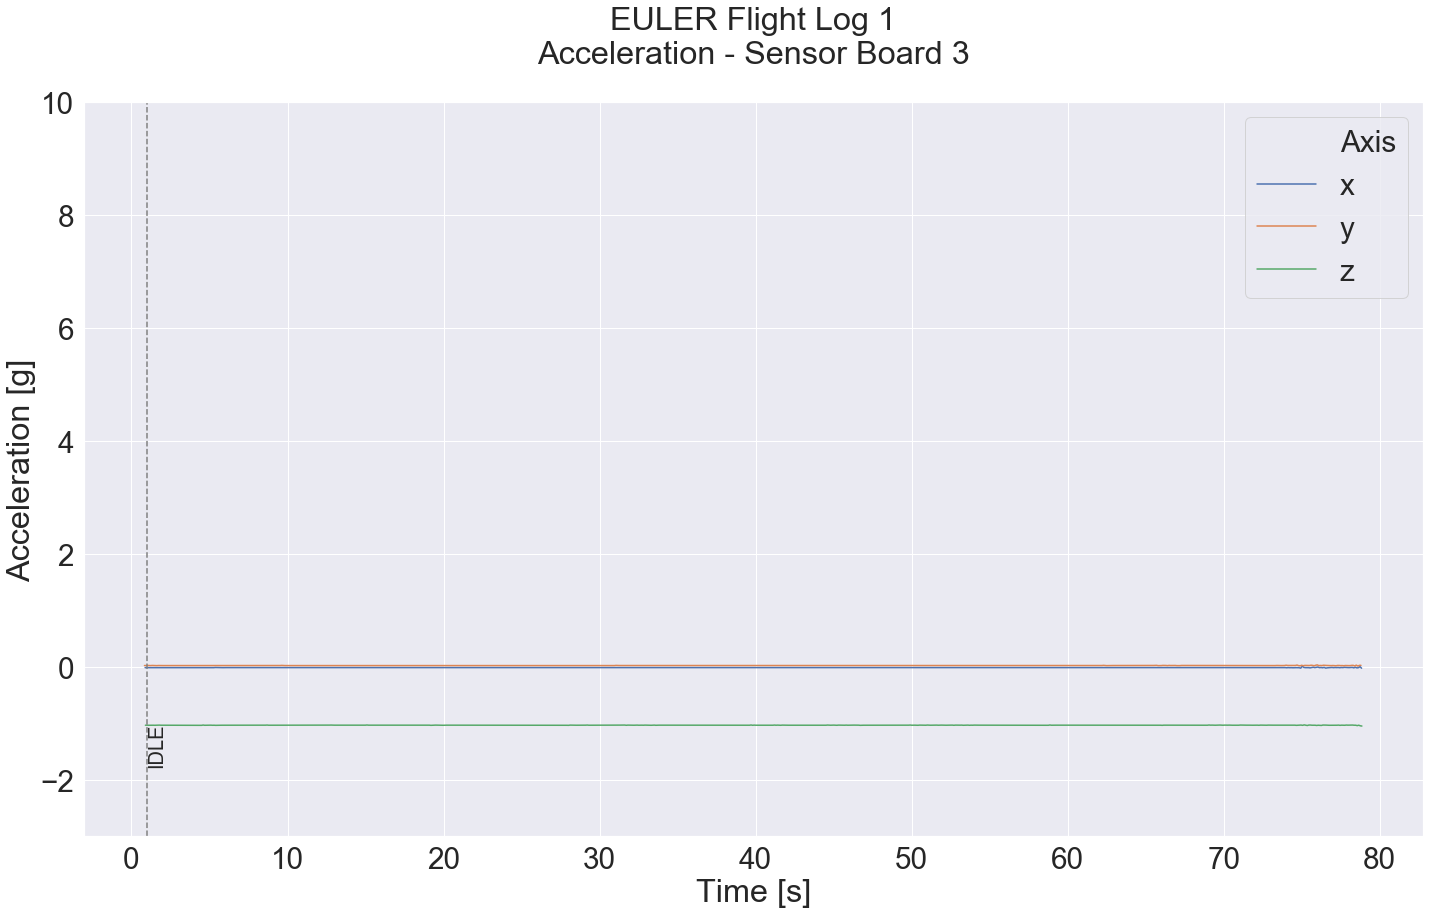

In [106]:
for sb_id in range(1, 4):
    ax = sns.lineplot(data = imu_log_long[imu_log_long['Sensor Board ID'] == sb_id], x = 'Time_s', y = 'Acc', hue = 'Axis')
    ax.set_title(f'EULER Flight Log {log_id}\nAcceleration - Sensor Board 3\n')
    ax.set_ylabel('Acceleration [g]')
    ax.set_xlabel('Time [s]')
    ax.legend(loc="upper right")
    ax.set_ylim(-3, 10)
    plot_states(state_transitions)
    plt.show()

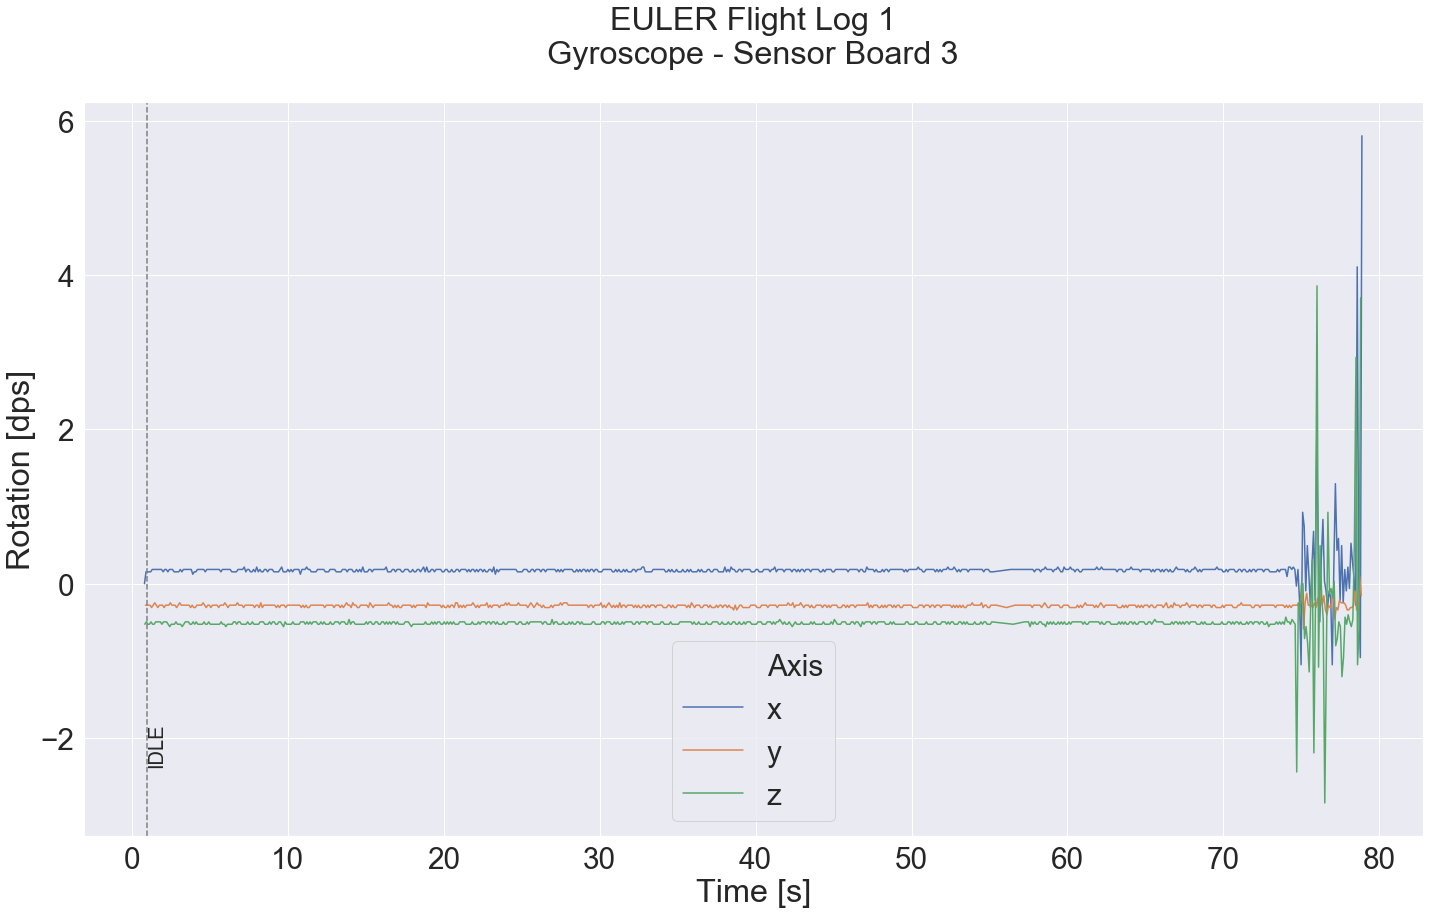

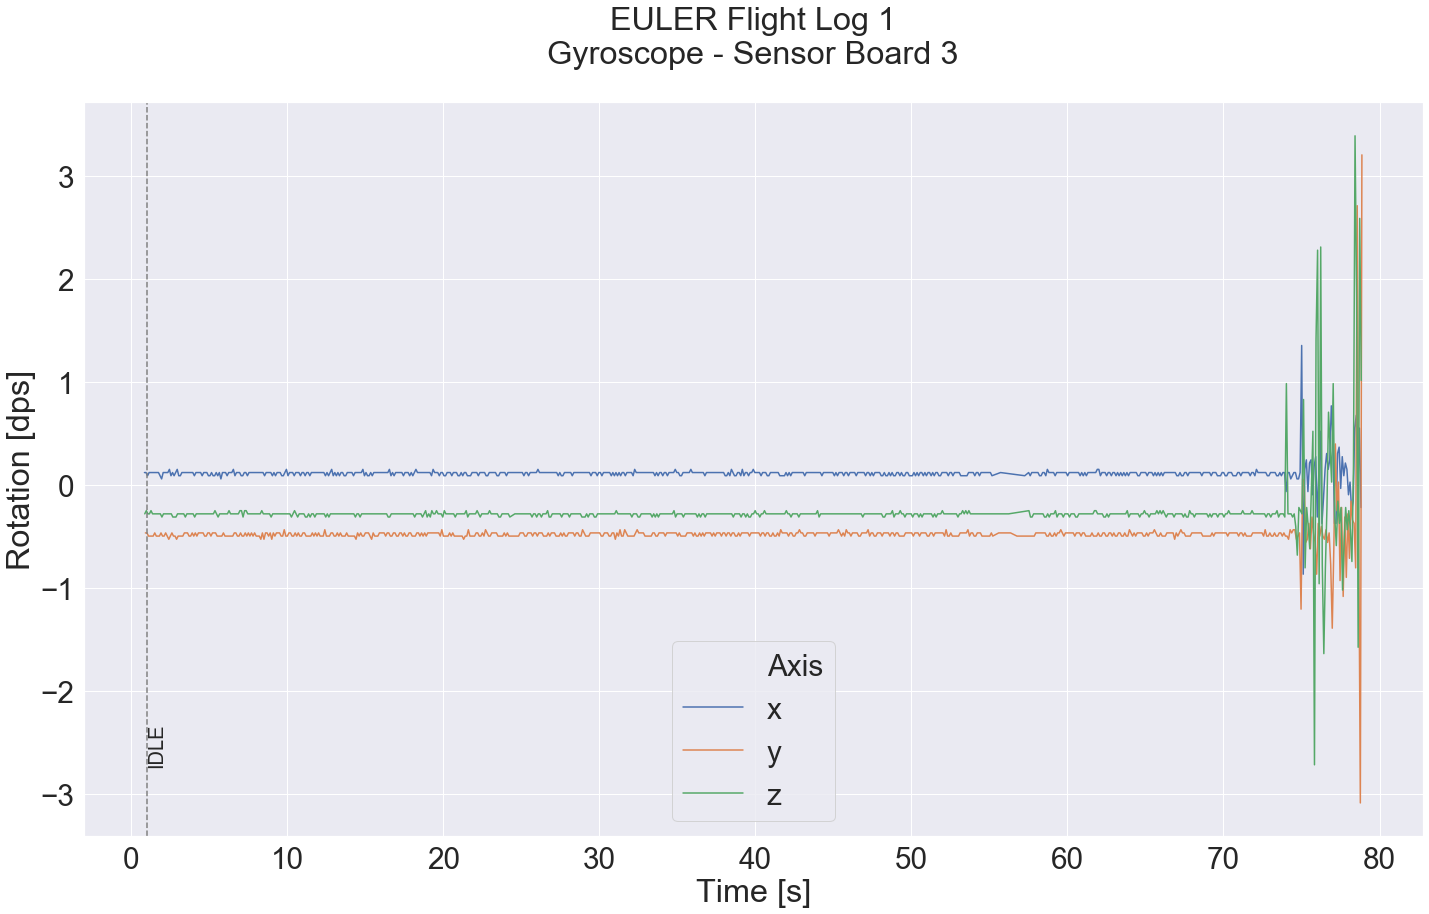

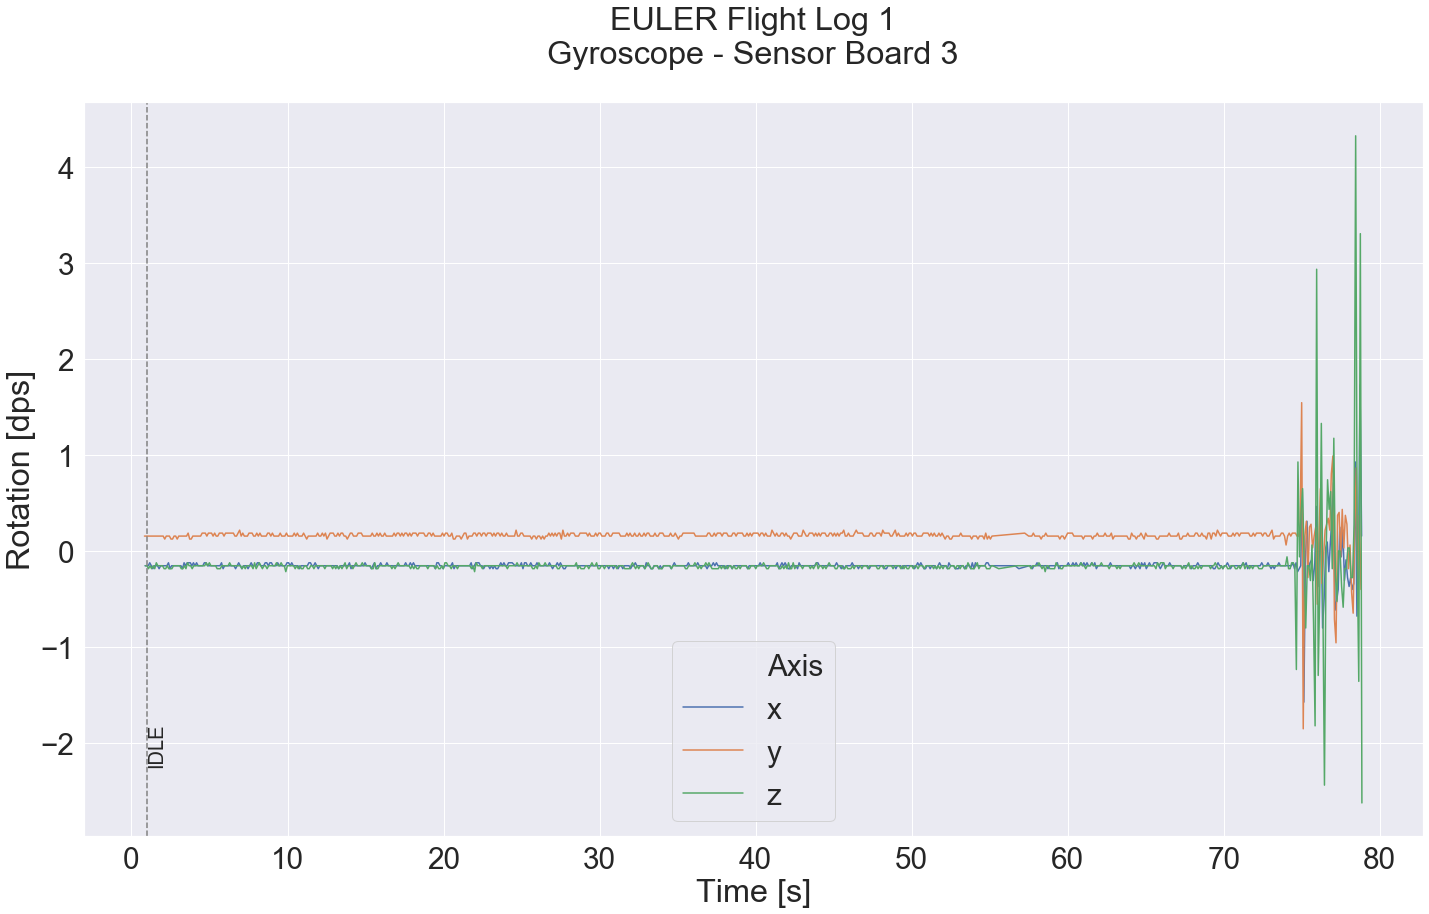

In [107]:
for sb_id in range(1, 4):
    ax = sns.lineplot(data = imu_log_long[imu_log_long['Sensor Board ID'] == sb_id], x = 'Time_s', y = 'Gyro', hue = 'Axis')
    ax.set_title(f'EULER Flight Log {log_id}\nGyroscope - Sensor Board 3\n')
    ax.set_ylabel('Rotation [dps]')
    ax.set_xlabel('Time [s]')
    plot_states(state_transitions)
    plt.show()

# Baro + Temp Plotting

In [108]:
baro_log = pd.read_csv(f'{split_logs_dir}/baro.csv', index_col = 0)
#sampling for faster drawing
baro_log = baro_log[::10]
baro_log.head()
baro_log['Sensor Board ID'] = baro_log['Sensor Board ID'].apply(str).apply(lambda x: 'SB ' + x)

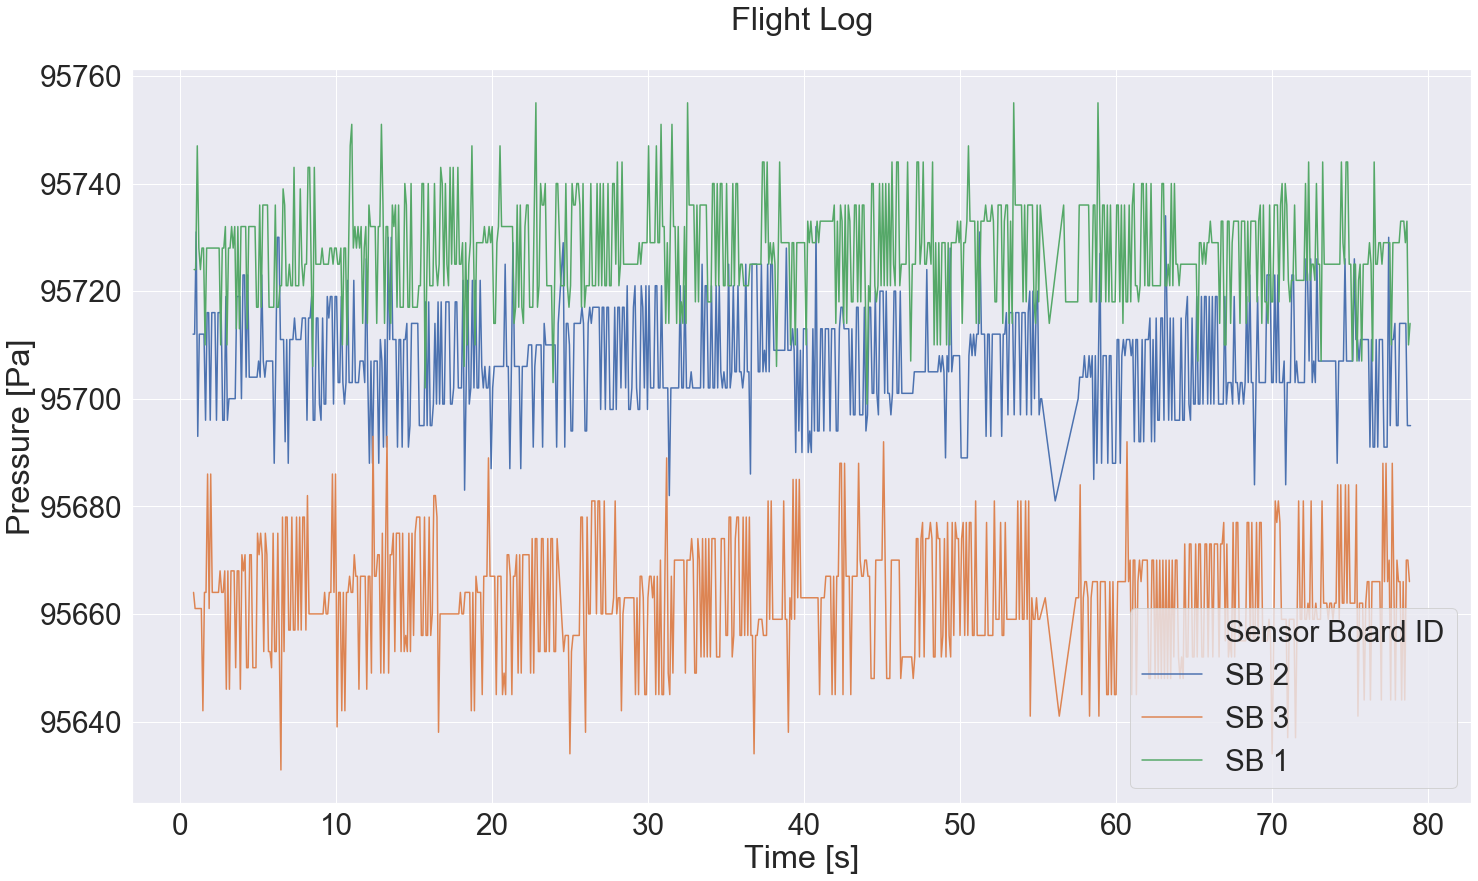

In [109]:
plt = sns.lineplot(data = baro_log[1:], x = 'Time_s', y = 'Pressure', hue = 'Sensor Board ID')
plt.set_title('Flight Log\n')
#plt.set_ylim(-3300, -3100)
plt.set_ylabel('Pressure [Pa]')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

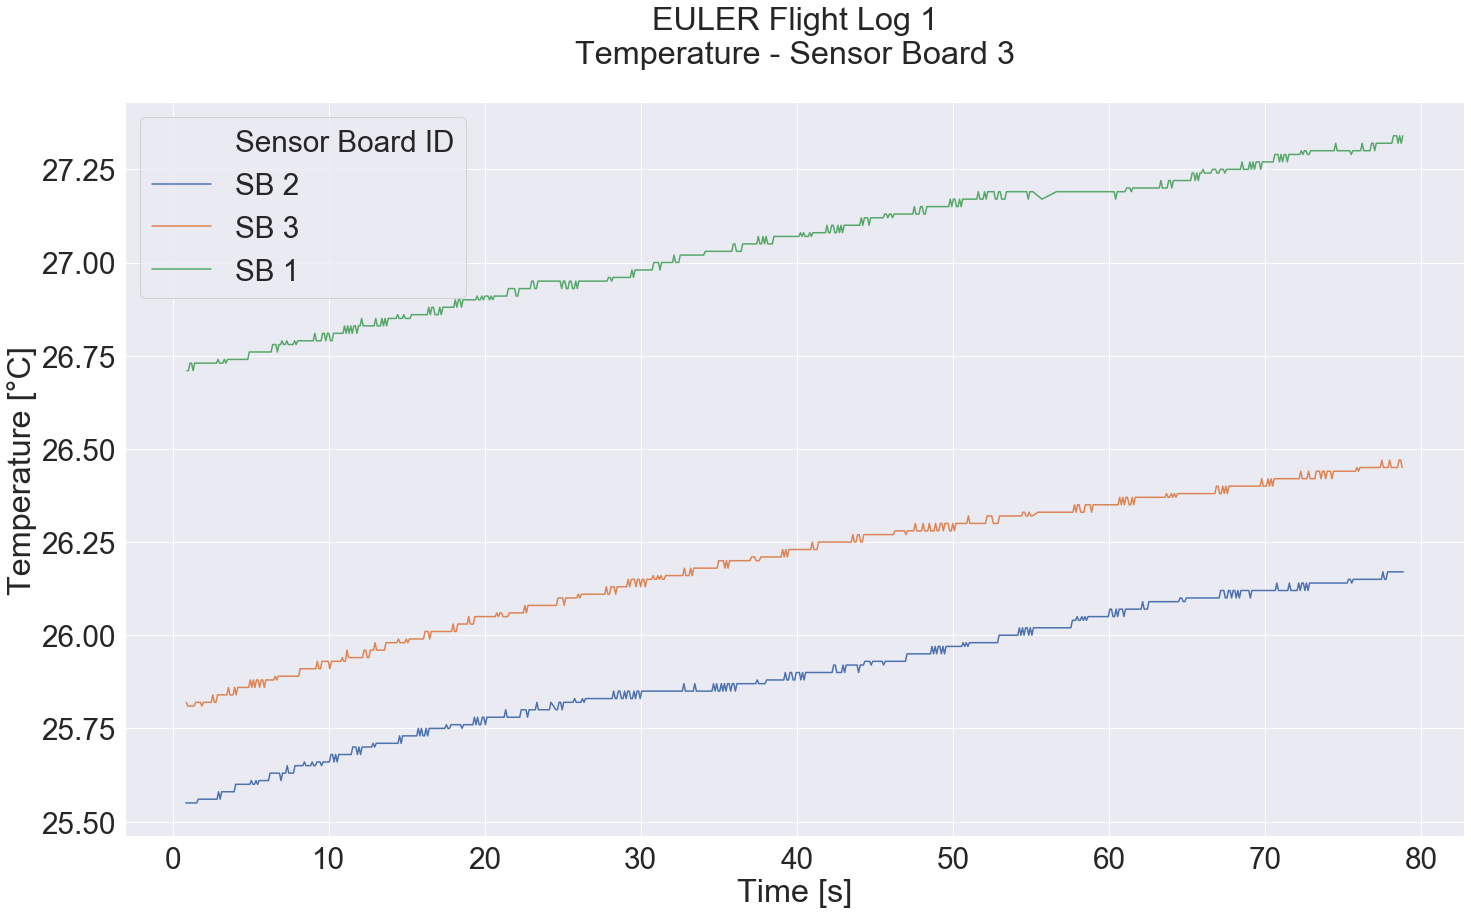

In [110]:
plt = sns.lineplot(data = baro_log[1:], x = 'Time_s', y = 'Temperature', hue = 'Sensor Board ID')
plt.set_title(f'EULER Flight Log {log_id}\nTemperature - Sensor Board 3\n')
plt.set_ylabel('Temperature [\N{DEGREE SIGN}C]')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)
#plt.set_ylim(-3300, -3100)
#ylabels = ['{:,.1f}'.format(y) + '\N{DEGREE SIGN}C' for y in plt.get_yticks()]
#plt.set_yticklabels(ylabels)

## Battery Plotting

In [111]:
battery_log = pd.read_csv(f'{split_logs_dir}/battery.csv', index_col = 0)
#sampling for faster drawing
battery_log = battery_log[::10]
battery_log.head()

,Timestamp,Time_s,Log Entry Type,Sensor Board ID,Sensor Type,Battery,Consumption,Current,Supply
Log Entry,,,,,,,,,
137,1002,1.002,SENSOR,1,BATTERY,353,0,0,3278
9582,11201,11.201,SENSOR,1,BATTERY,369,0,0,3273
19087,21401,21.401,SENSOR,1,BATTERY,390,0,0,3273
29309,32621,32.621,SENSOR,1,BATTERY,414,0,0,3271
38814,42821,42.821,SENSOR,1,BATTERY,433,0,0,3272


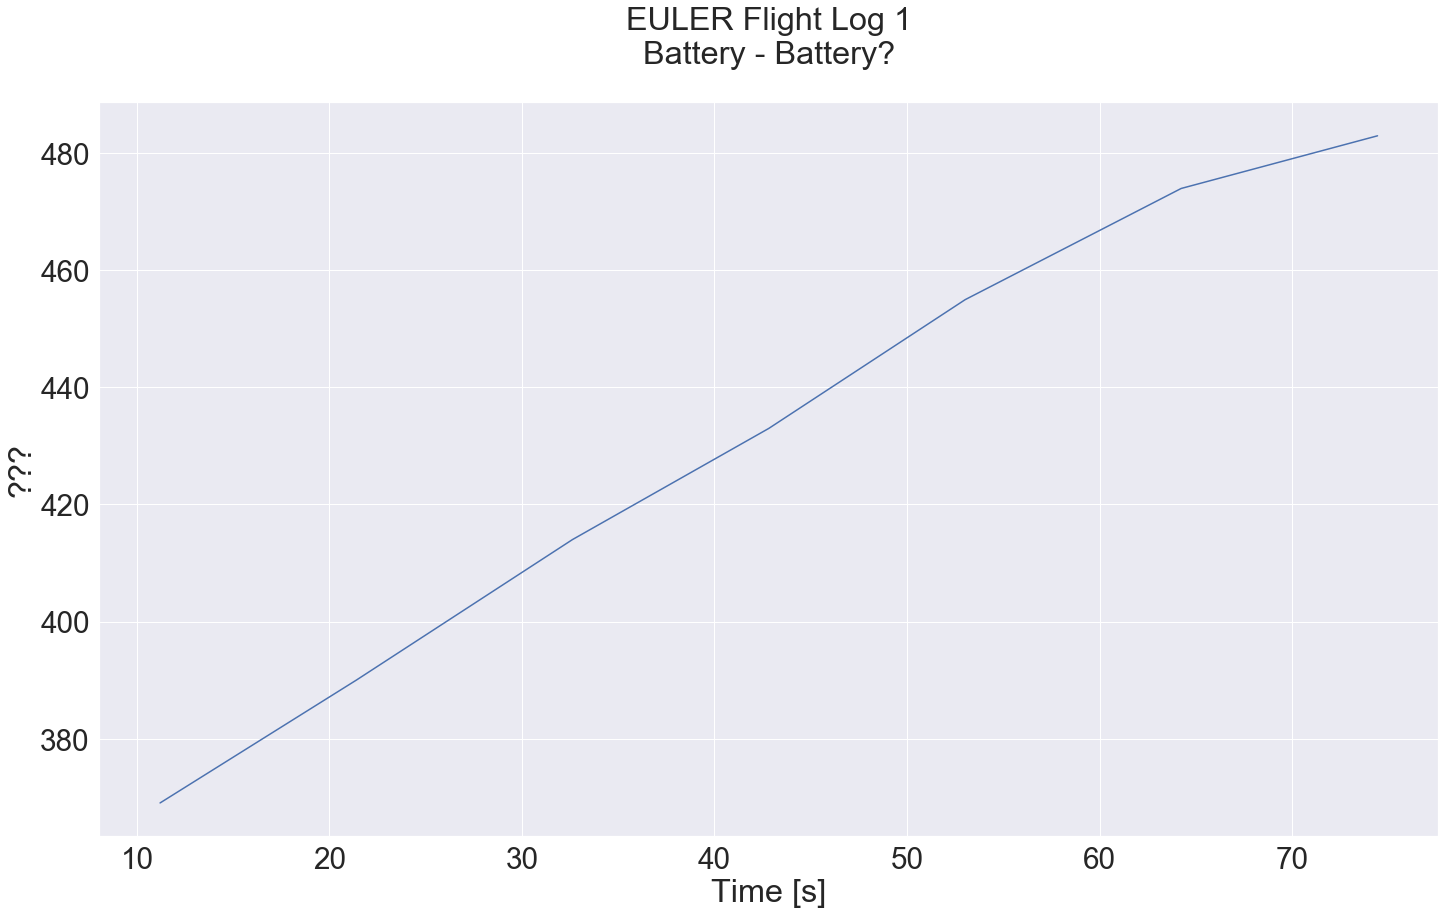

In [112]:
plt = sns.lineplot(data = battery_log[1:], x = 'Time_s', y = 'Battery')
plt.set_title(f'EULER Flight Log {log_id}\nBattery - Battery?\n')
plt.set_ylabel('???')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

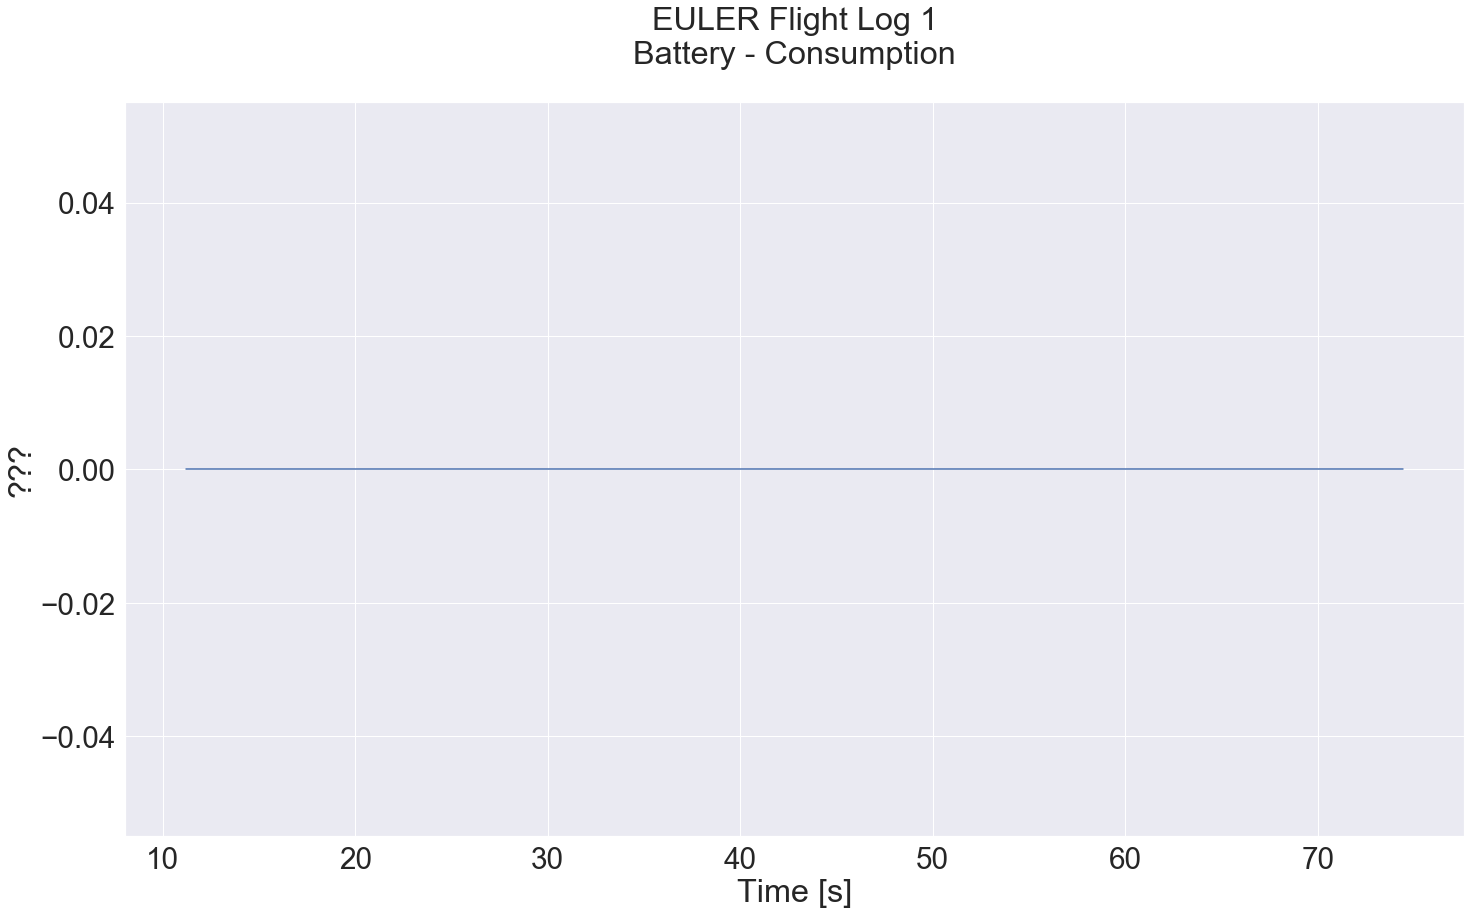

In [113]:
plt = sns.lineplot(data = battery_log[1:], x = 'Time_s', y = 'Consumption')
plt.set_title(f'EULER Flight Log {log_id}\nBattery - Consumption\n')
plt.set_ylabel('???')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

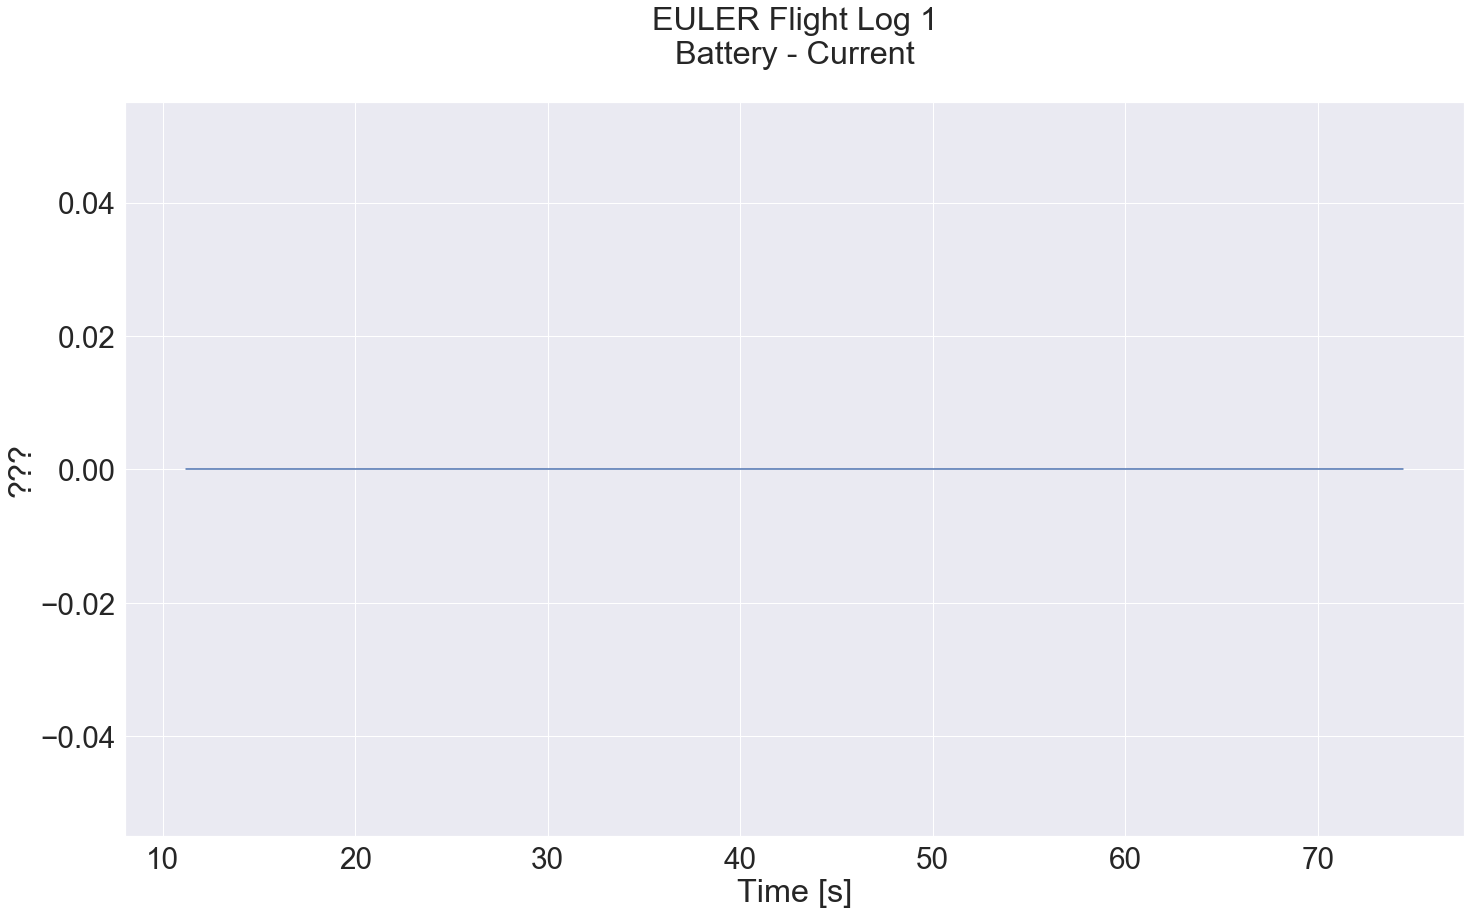

In [114]:
plt = sns.lineplot(data = battery_log[1:], x = 'Time_s', y = 'Current')
plt.set_title(f'EULER Flight Log {log_id}\nBattery - Current\n')
plt.set_ylabel('???')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

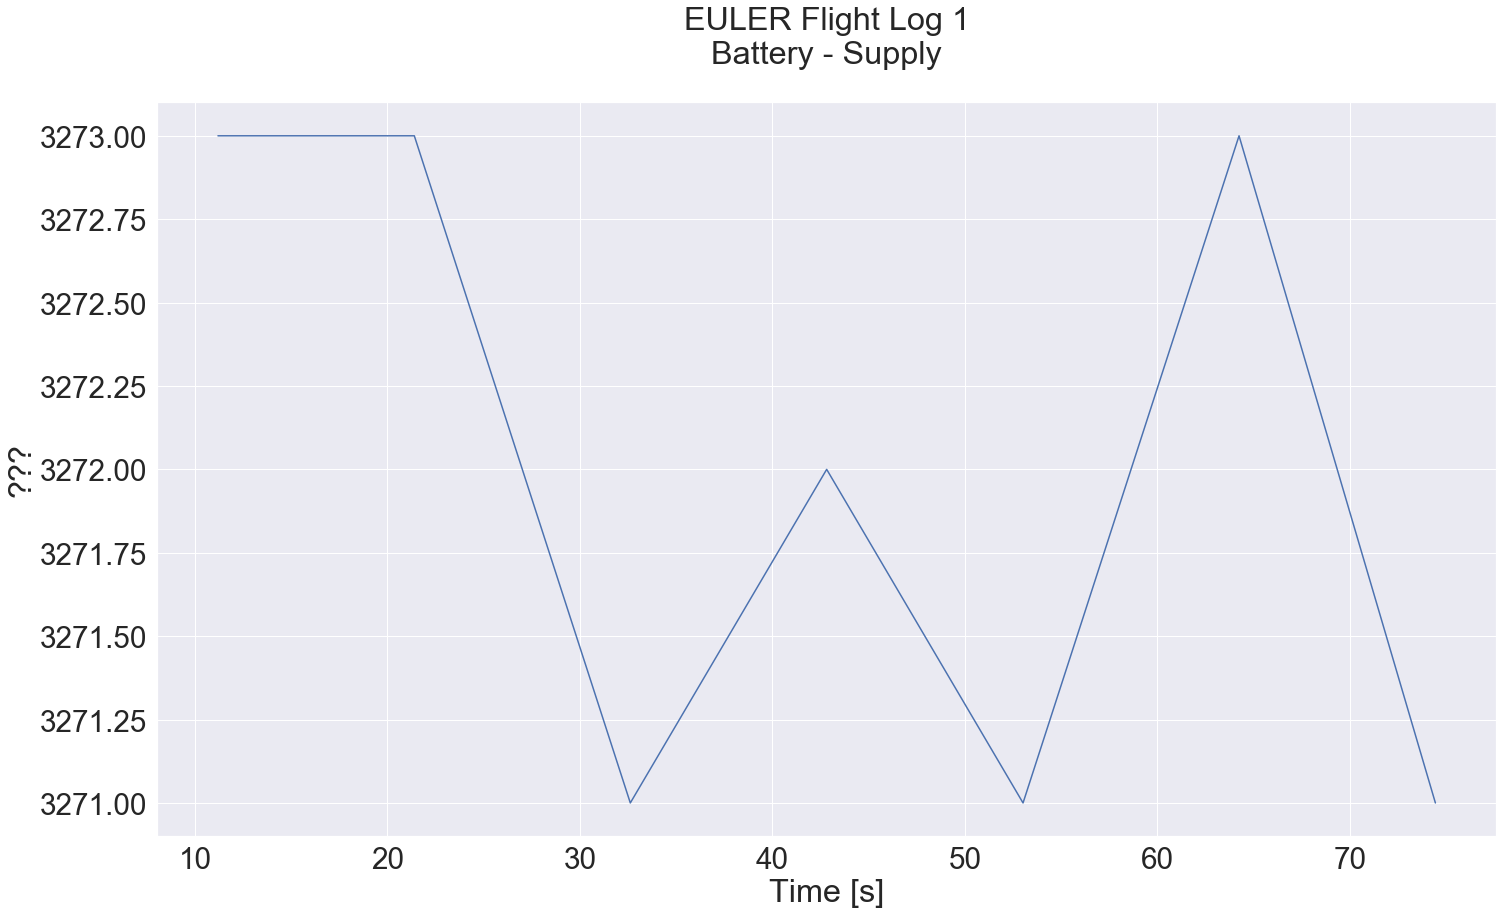

In [115]:
plt = sns.lineplot(data = battery_log[1:], x = 'Time_s', y = 'Supply')
plt.set_title(f'EULER Flight Log {log_id}\nBattery - Supply\n')
plt.set_ylabel('???')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

## Estimator Vars Plotting

In [116]:
estimator_var_log = pd.read_csv(f'{split_logs_dir}/estimator_var.csv', index_col = 0)
#sampling for faster drawing
estimator_var_log = estimator_var_log[::10]
estimator_var_log.head()

,Timestamp,Time_s,Log Entry Type,World Position (z),Rocket Velocity (z),Rocket Acceleration (z)
Log Entry,,,,,,
66,901,0.901,ESTIMATOR_VAR,0.000,0.001,0.188
146,1006,1.006,ESTIMATOR_VAR,0.002,0.025,0.175
227,1104,1.104,ESTIMATOR_VAR,0.010,0.070,0.188
317,1204,1.204,ESTIMATOR_VAR,0.034,0.160,0.172
407,1304,1.304,ESTIMATOR_VAR,0.091,0.314,0.182


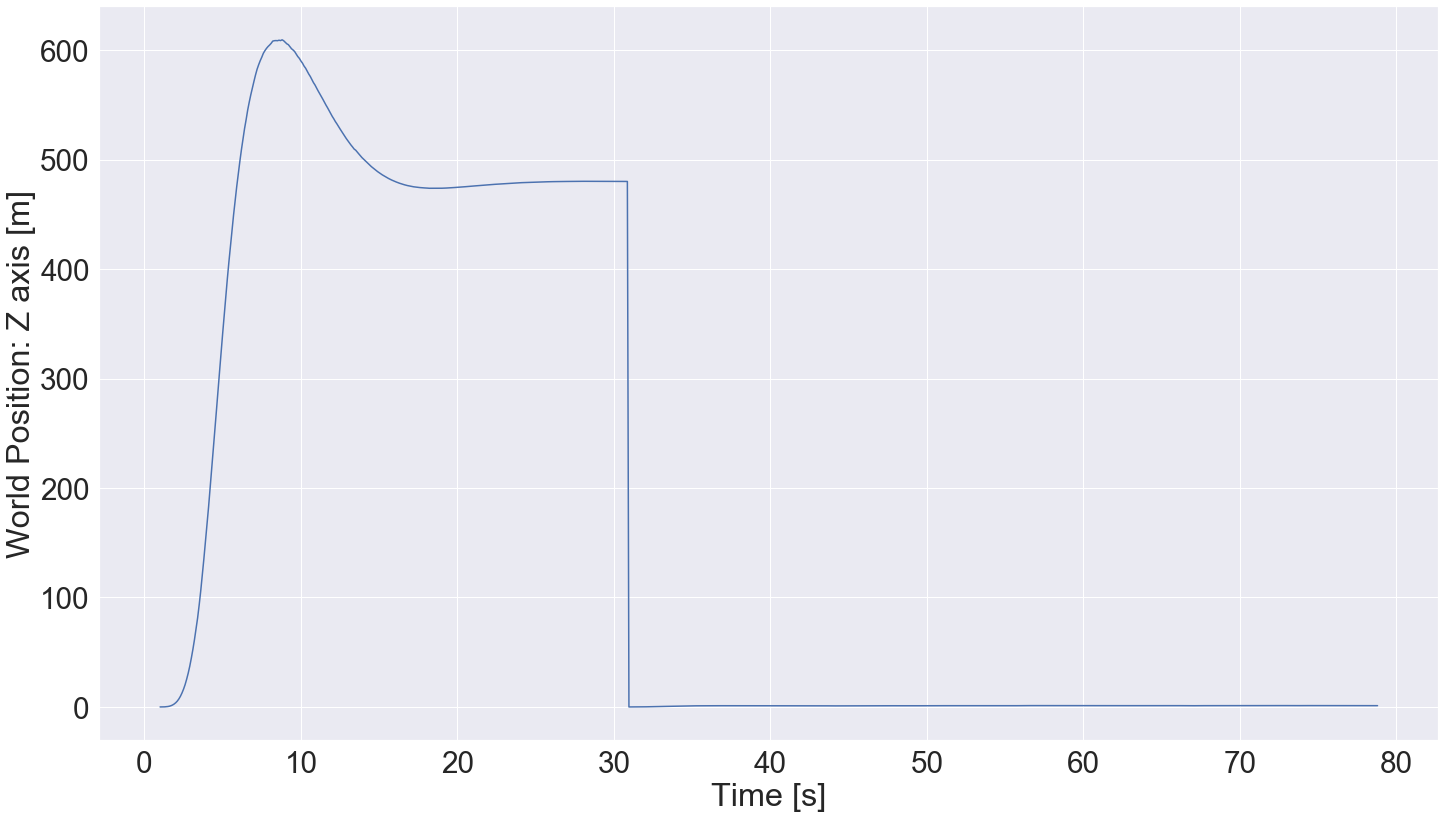

In [117]:
plt = sns.lineplot(data = estimator_var_log[1:], x = 'Time_s', y = 'World Position (z)')
plt.set_ylabel('World Position: Z axis [m]')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

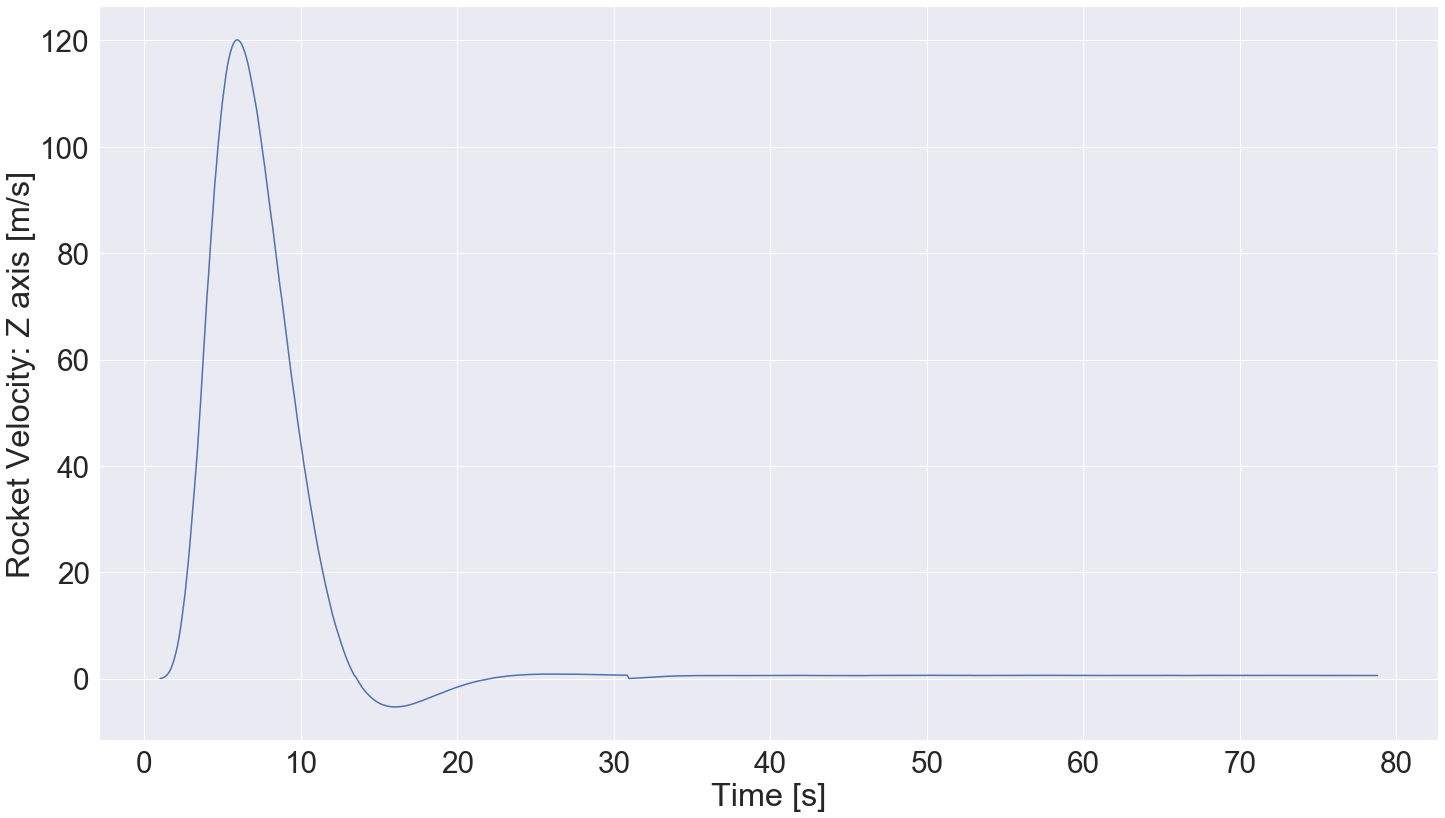

In [118]:
plt = sns.lineplot(data = estimator_var_log[1:], x = 'Time_s', y = 'Rocket Velocity (z)')
plt.set_ylabel('Rocket Velocity: Z axis [m/s]')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

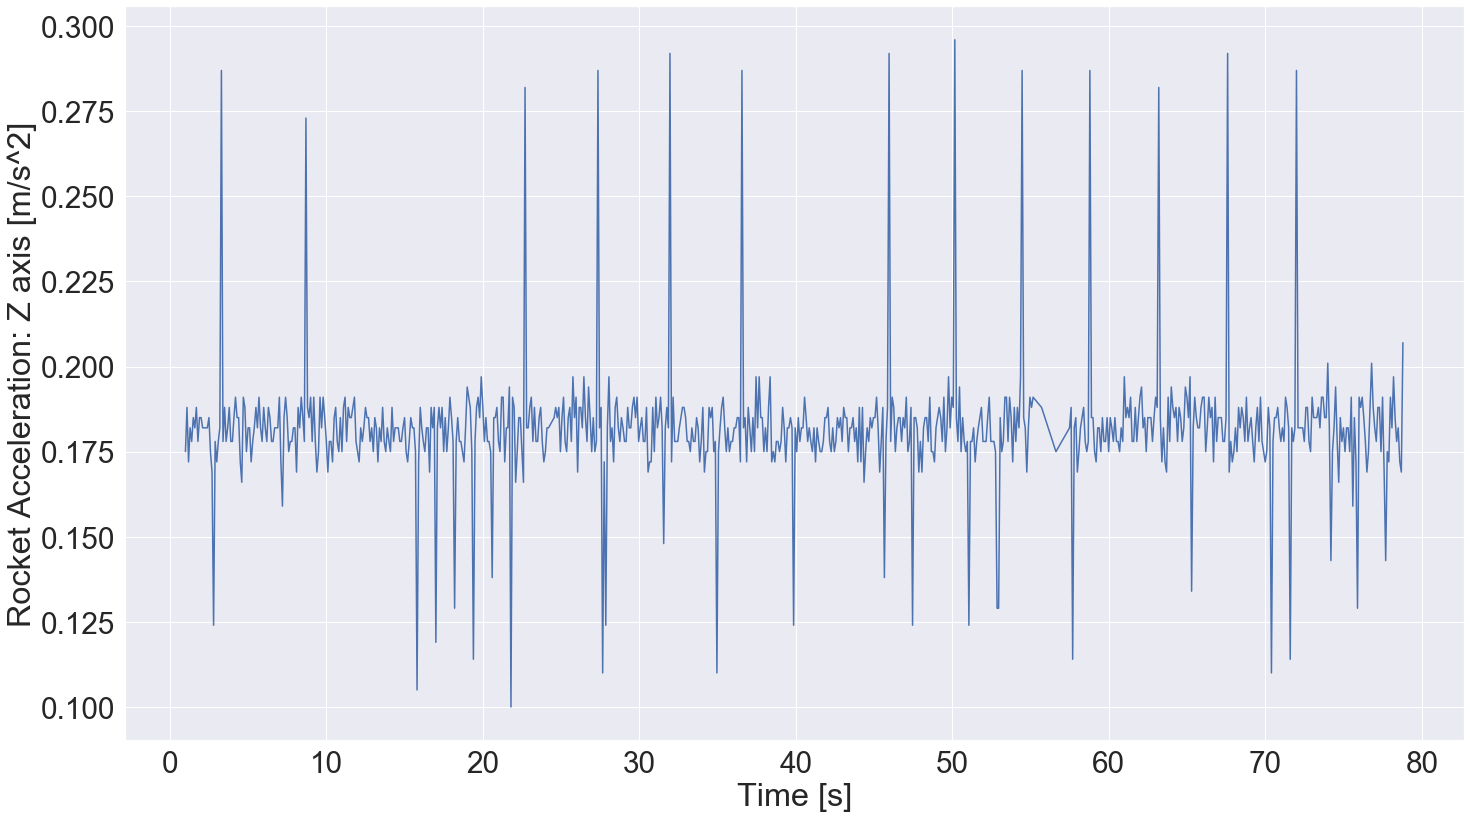

In [119]:
plt = sns.lineplot(data = estimator_var_log[1:], x = 'Time_s', y = 'Rocket Acceleration (z)')
plt.set_ylabel('Rocket Acceleration: Z axis [m/s^2]')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

In [120]:
controller_out_log = pd.read_csv(f'{split_logs_dir}/controller_out.csv', index_col = 0)
controller_out_log.head()

,Timestamp,Time_s,Log Entry Type,Controller Output,Reference Error,Integrated Error
Log Entry,,,,,,
220,1101,1.101,CONTROLLER_OUTPUT,0.0,0.0,0.0
229,1111,1.111,CONTROLLER_OUTPUT,0.0,0.0,0.0
238,1121,1.121,CONTROLLER_OUTPUT,0.0,0.0,0.0
247,1131,1.131,CONTROLLER_OUTPUT,0.0,0.0,0.0
256,1141,1.141,CONTROLLER_OUTPUT,0.0,0.0,0.0


In [121]:
controller_out_log['Controller Output'].unique()

array([0.])

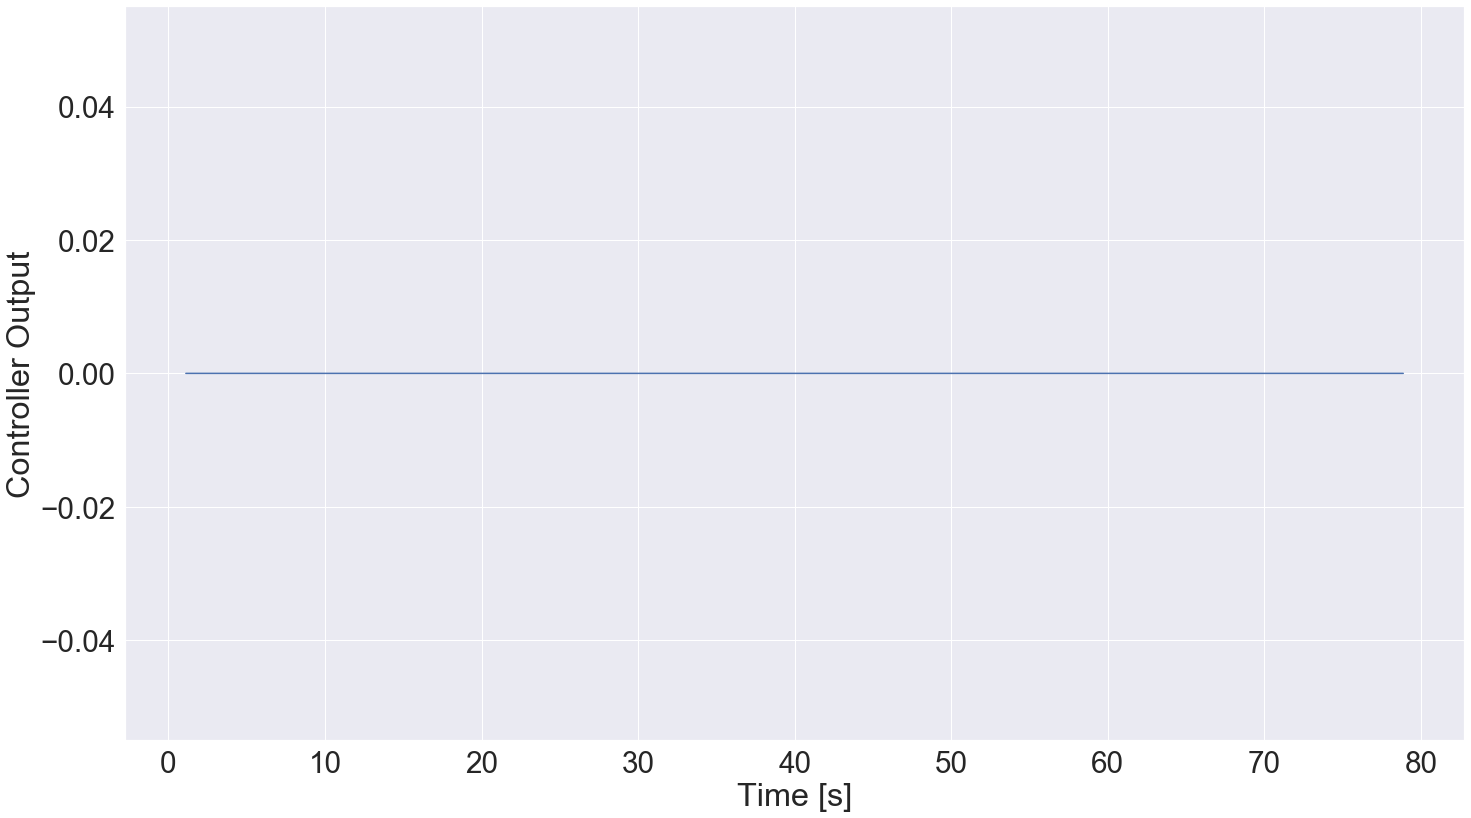

In [122]:
plt = sns.lineplot(data = controller_out_log[1:], x = 'Time_s', y = 'Controller Output')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

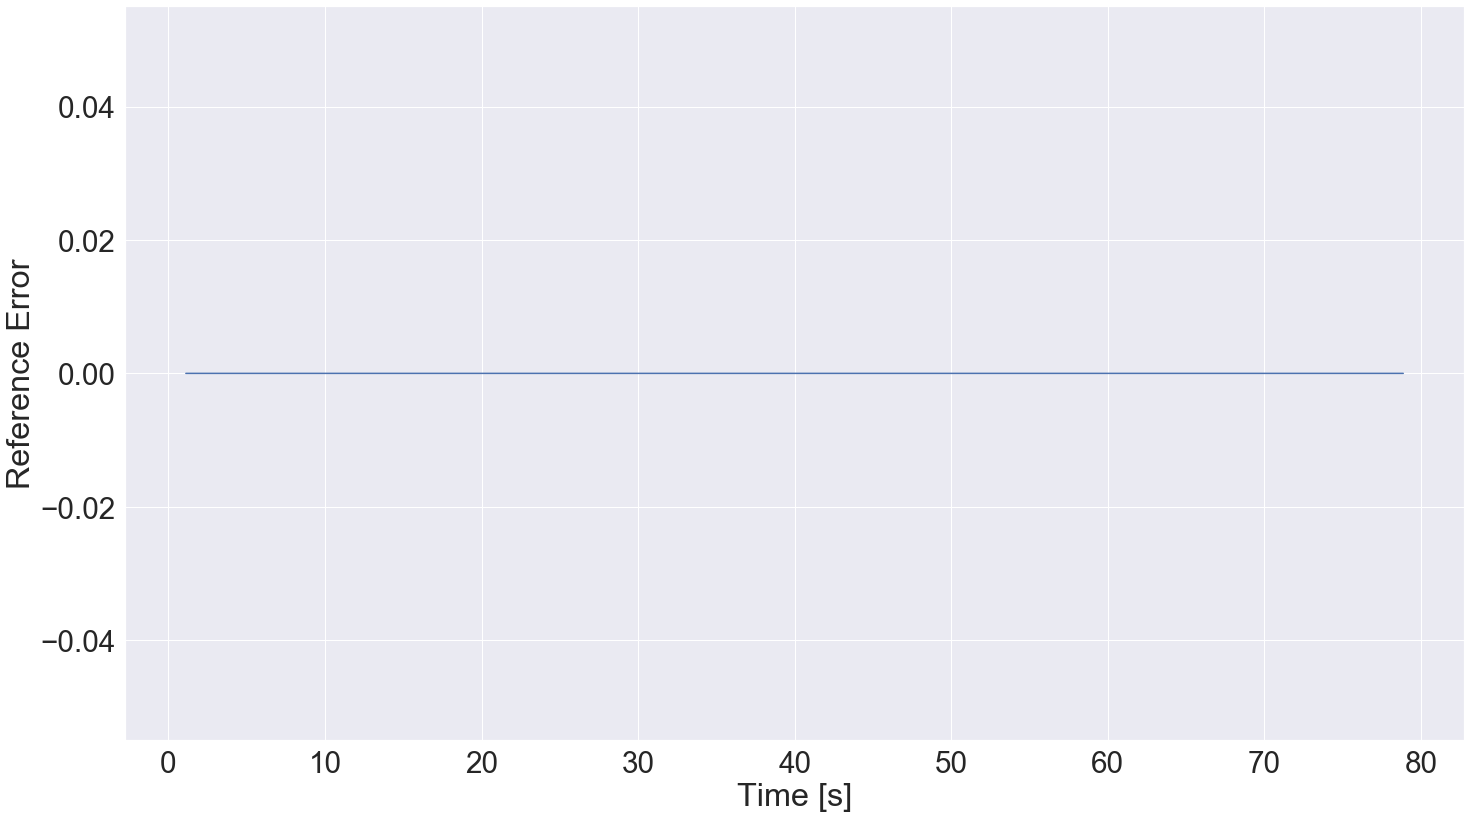

In [123]:
plt = sns.lineplot(data = controller_out_log[1:], x = 'Time_s', y = 'Reference Error')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)

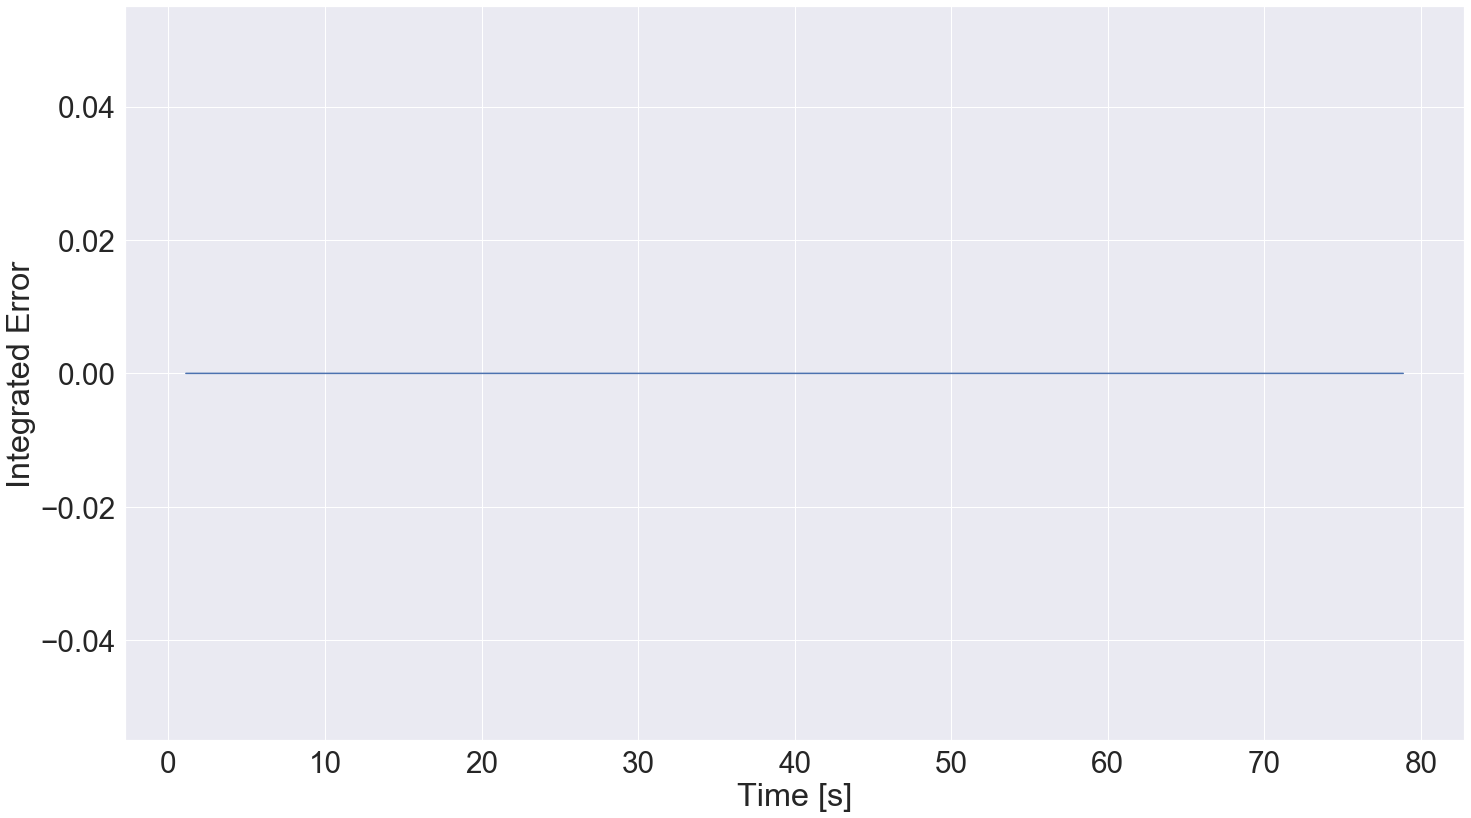

In [124]:
plt = sns.lineplot(data = controller_out_log[1:], x = 'Time_s', y = 'Integrated Error')
plt.set_xlabel('Time [s]')
plot_states(state_transitions)